In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
file_path = "/content/HousingData.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.CHAS.fillna(df.CHAS.mean(),inplace=True)

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS        0
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df.fillna(df.median(),inplace=True)

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
x_cols = df.columns[:-1]

In [12]:
y_col = df.columns[-1]

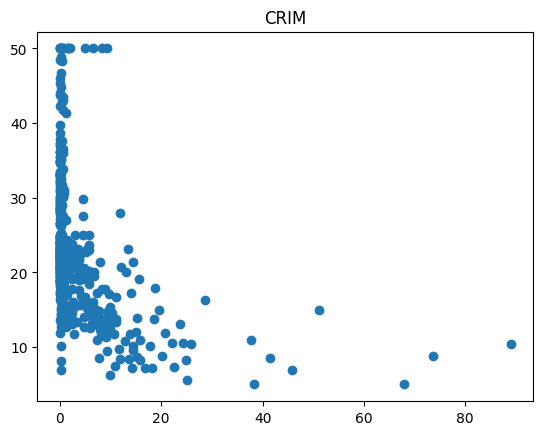

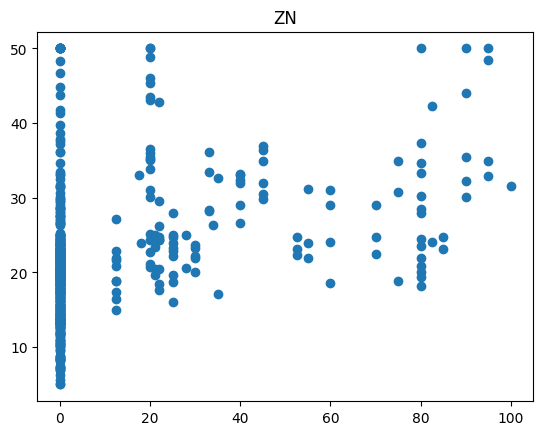

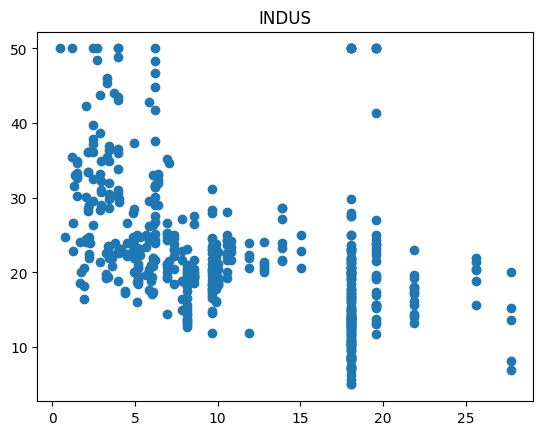

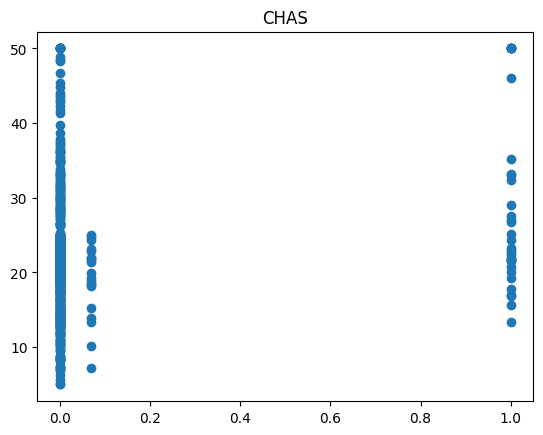

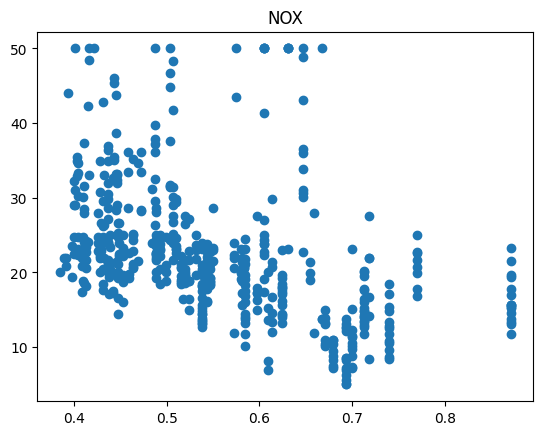

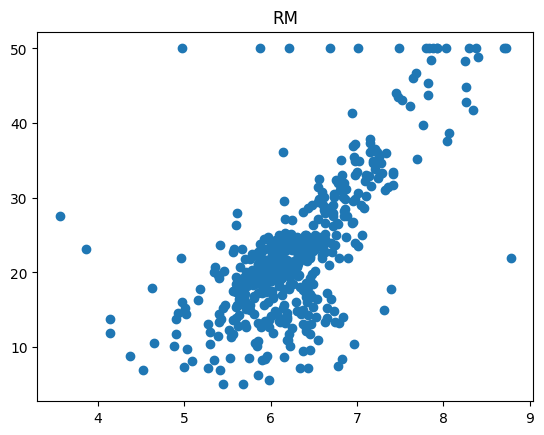

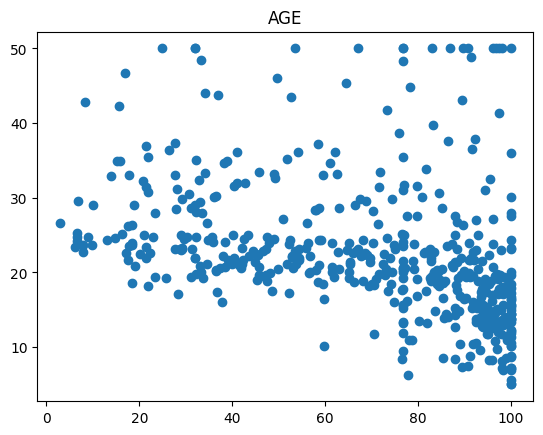

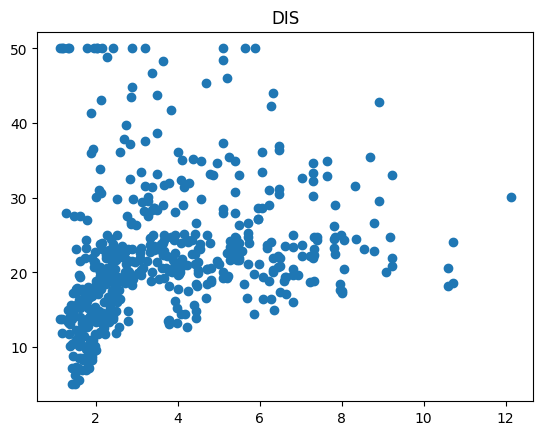

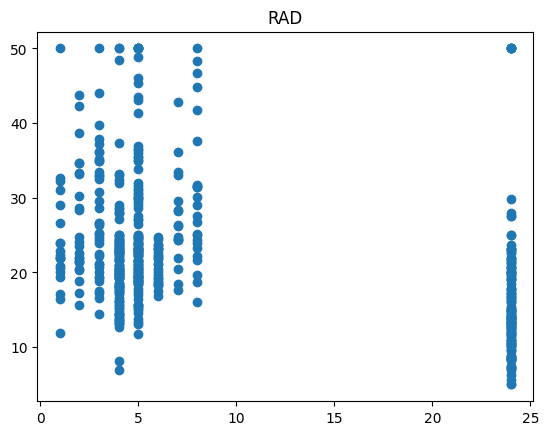

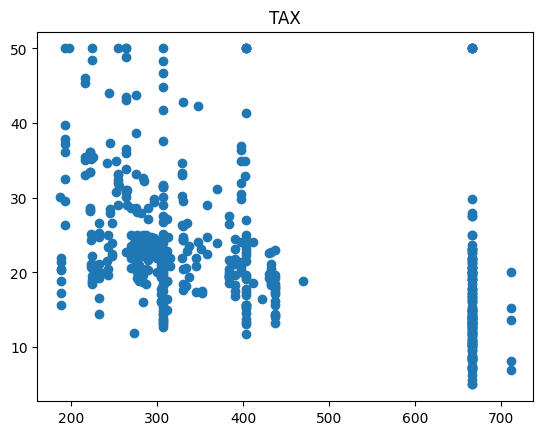

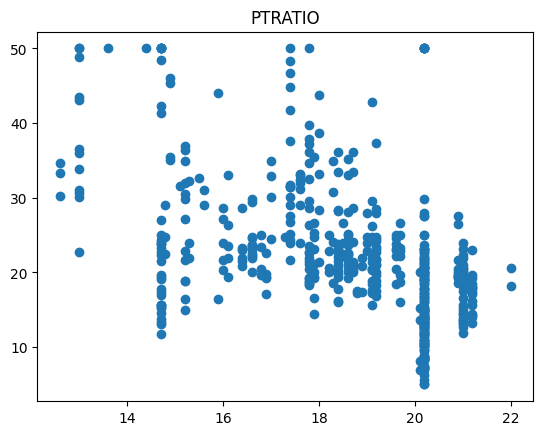

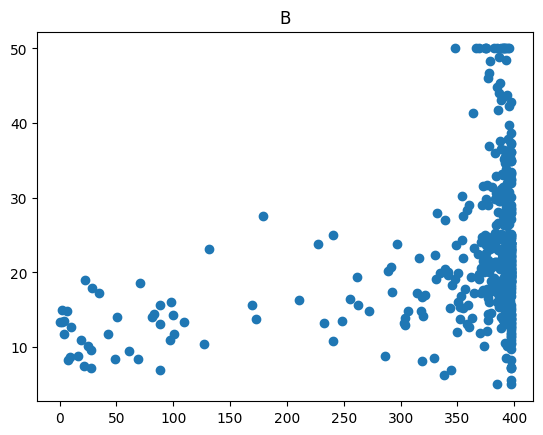

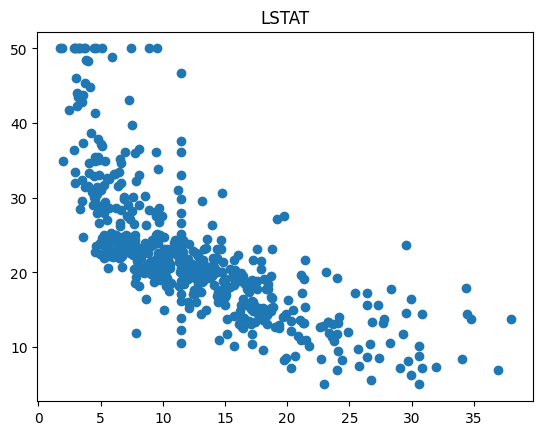

In [13]:
for col in x_cols:
  plt.scatter(x=df[col],y=df[y_col])
  plt.title(col)
  plt.show()

In [14]:
df.corr().MEDV

CRIM      -0.383895
ZN         0.362292
INDUS     -0.476394
CHAS       0.179882
NOX       -0.427321
RM         0.695360
AGE       -0.377572
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.723093
MEDV       1.000000
Name: MEDV, dtype: float64

<Axes: >

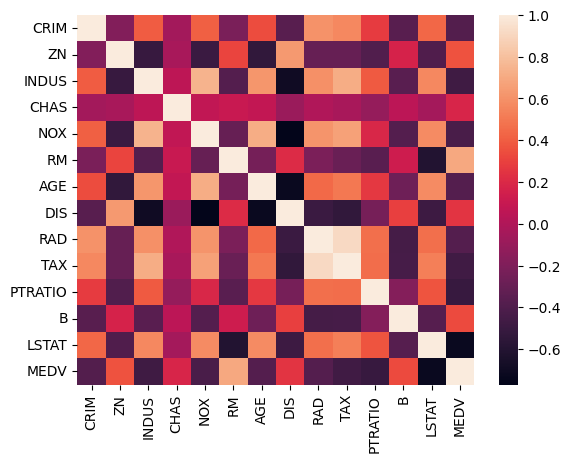

In [15]:
sns.heatmap(df.corr())

In [16]:
cols_to_drop = ["B","RAD","CHAS","ZN"]

In [17]:
df = df.drop(columns=cols_to_drop)

In [18]:
x_cols = df.columns[:-1]

In [19]:
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,11.028893,0.554695,6.284634,68.845850,3.795043,408.237154,18.455534,12.664625,22.532806
std,8.570832,6.704679,0.115878,0.702617,27.486962,2.105710,168.537116,2.164946,7.017219,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,0.083235,5.190000,0.449000,5.885500,45.925000,2.100175,279.000000,17.400000,7.230000,17.025000
50%,0.253715,9.690000,0.538000,6.208500,76.800000,3.207450,330.000000,19.050000,11.430000,21.200000
75%,2.808720,18.100000,0.624000,6.623500,93.575000,5.188425,666.000000,20.200000,16.570000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,37.970000,50.000000


In [20]:
minmax_scaler = MinMaxScaler()

In [21]:
# df = pd.DataFrame(minmax_scaler.fit_transform(df),columns=df.columns)

In [22]:
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,11.028893,0.554695,6.284634,68.845850,3.795043,408.237154,18.455534,12.664625,22.532806
std,8.570832,6.704679,0.115878,0.702617,27.486962,2.105710,168.537116,2.164946,7.017219,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,0.083235,5.190000,0.449000,5.885500,45.925000,2.100175,279.000000,17.400000,7.230000,17.025000
50%,0.253715,9.690000,0.538000,6.208500,76.800000,3.207450,330.000000,19.050000,11.430000,21.200000
75%,2.808720,18.100000,0.624000,6.623500,93.575000,5.188425,666.000000,20.200000,16.570000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,37.970000,50.000000


In [23]:
X = df[x_cols]
Y = df[[y_col]]

In [24]:
Y.columns

Index(['MEDV'], dtype='object')

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
mse = mean_squared_error(y_test,y_pred)

In [30]:
mse

25.66897714043645